<a href="https://colab.research.google.com/github/hughjafro/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/CT_LS_DS_143_Introduction_to_Bayesian_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 143

## Introduction to Bayesian Inference

!['Detector! What would the Bayesian statistician say if I asked him whether the--' [roll] 'I AM A NEUTRINO DETECTOR, NOT A LABYRINTH GUARD. SERIOUSLY, DID YOUR BRAIN FALL OUT?' [roll] '... yes.'](https://imgs.xkcd.com/comics/frequentists_vs_bayesians.png)

*[XKCD 1132](https://www.xkcd.com/1132/)*


# My Resources for Bayesian Rule

### Intro to Bayesian Approach (from Peyton)
* https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/

--

### Difference between frequentist and bayesian approach to data
1. https://stats.stackexchange.com/questions/332276/how-do-frequentist-vs-bayesian-views-of-probability-lead-to-their-different-tre
2. https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading20.pdf

--

### Bayes Factor - Wiki
* https://en.wikipedia.org/wiki/Bayes_factor#Example


--


## Prepare - Bayes' Theorem and the Bayesian mindset



Bayes' theorem possesses a near-mythical quality - a bit of math that somehow magically evaluates a situation. But this mythicalness has more to do with its reputation and advanced applications than the actual core of it - deriving it is actually remarkably straightforward.

### The Law of Total Probability

By definition, the total probability of all outcomes (events) if some variable (event space) $A$ is 1. That is:

$$P(A) = \sum_n P(A_n) = 1$$

The law of total probability takes this further, considering two variables ($A$ and $B$) and relating their marginal probabilities (their likelihoods considered independently, without reference to one another) and their conditional probabilities (their likelihoods considered jointly). A marginal probability is simply notated as e.g. $P(A)$, while a conditional probability is notated $P(A|B)$, which reads "probability of $A$ *given* $B$".

The law of total probability states:

$$P(A) = \sum_n P(A | B_n) P(B_n)$$

In words - the total probability of $A$ is equal to the sum of the conditional probability of $A$ on any given event $B_n$ times the probability of that event $B_n$, and summed over all possible events in $B$.

### The Law of Conditional Probability

What's the probability of something conditioned on something else? To determine this we have to go back to set theory and think about the intersection of sets:

The formula for actual calculation:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

We can see how this relates back to the law of total probability - multiply both sides by $P(B)$ and you get $P(A|B)P(B) = P(A \cap B)$ - replaced back into the law of total probability we get $P(A) = \sum_n P(A \cap B_n)$.

This may not seem like an improvement at first, but try to relate it back to the above picture - if you think of sets as physical objects, we're saying that the total probability of $A$ given $B$ is all the little pieces of it intersected with $B$, added together. The conditional probability is then just that again, but divided by the probability of $B$ itself happening in the first place.

### Bayes Theorem

Here is is, the seemingly magic tool:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

In words - the probability of $A$ conditioned on $B$ is the probability of $B$ conditioned on $A$, times the probability of $A$ and divided by the probability of $B$. These unconditioned probabilities are referred to as "prior beliefs", and the conditioned probabilities as "updated."

Why is this important? Scroll back up to the XKCD example - the Bayesian statistician draws a less absurd conclusion because their prior belief in the likelihood that the sun will go nova is extremely low. So, even when updated based on evidence from a detector that is $35/36 = 0.972$ accurate, the prior belief doesn't shift enough to change their overall opinion.

There's many examples of Bayes' theorem - one less absurd example is to apply to [breathalyzer tests](https://www.bayestheorem.net/breathalyzer-example/). You may think that a breathalyzer test that is 100% accurate for true positives (detecting somebody who is drunk) is pretty good, but what if it also has 8% false positives (indicating somebody is drunk when they're not)? And furthermore, the rate of drunk driving (and thus our prior belief)  is 1/1000.

What is the likelihood somebody really is drunk if they test positive? Some may guess it's 92% - the difference between the true positives and the false positives. But we have a prior belief of the background/true rate of drunk driving. Sounds like a job for Bayes' theorem!

$$
\begin{aligned}
P(Drunk | Positive) &= \frac{P(Positive | Drunk)P(Drunk)}{P(Positive)} \\
&= \frac{1 \times 0.001}{0.08} \\
&= 0.0125
\end{aligned}
$$

In other words, the likelihood that somebody is drunk given they tested positive with a breathalyzer in this situation is only 1.25% - probably much lower than you'd guess. This is why, in practice, it's important to have a repeated test to confirm (the probability of two false positives in a row is $0.08 * 0.08 = 0.0064$, much lower), and Bayes' theorem has been relevant in court cases where proper consideration of evidence was important.

## Live Lecture - Deriving Bayes' Theorem, Calculating Bayesian Confidence

Notice that $P(A|B)$ appears in the above laws - in Bayesian terms, this is the belief in $A$ updated for the evidence $B$. So all we need to do is solve for this term to derive Bayes' theorem. Let's do it together! --- Use LaTeX to format math equations

$x = 2$ is an inline equation.

$$
x = 2
$$

is a block equation.

$$
\begin{aligned}
x &= 2 \\
&= 1 + 1
\end{aligned}
$$

Now let's derive Bayes!

$$
\begin{aligned}
P(A \cap B) &= P(B \cap A) \\
\\
P(A|B) &= \frac{P(A \cap B)}{P(B)} \\
\Rightarrow P(A|B)P(B) &= P(A \cap B) \\
P(B|A) &= \frac{P(B \cap A)}{P(A)} \\
\Rightarrow P(B|A)P(A) &= P(B \cap A) = P(A \cap B) \\
\Rightarrow P(A|B)P(B) &= P(B | A)P(A) \\
\\
Memorize This ! \Rightarrow P(A|B)&= \frac{P(B|A)P(A)}{P(B)}
\end{aligned}
$$

Can Use https://docs.pymc.io/ for more advanced calculations.

In [0]:
# Activity 2 - Use SciPy to calculate Bayesian confidence intervals
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bayes_mvs.html#scipy.stats.bayes_mvs


from scipy import stats
import numpy as np

coinflips = np.random.binomial(n=1, p=0.5, size=100)
print(coinflips)

[1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0
 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1
 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1]


In [0]:
# Frequentist Approach from yesterday

def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2., n-1)
  return (mean, mean - interval, mean + interval)

confidence_interval(coinflips)

(0.51, 0.4103092906280824, 0.6096907093719176)

In [0]:
import pandas as pd
pd.DataFrame(coinflips).describe()

,0
count,100.000000
mean,0.510000
std,0.502418
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [0]:
# Bayesian Approach
# Give variance and stdev with confidence
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bayes_mvs.html#scipy.stats.bayes_mvs
stats.bayes_mvs(coinflips)

(Mean(statistic=0.51, minmax=(0.42657889423317225, 0.5934211057668277)),
 Variance(statistic=0.25762886597938145, minmax=(0.2027993920827174, 0.32435028891692586)),
 Std_dev(statistic=0.5062650711820841, minmax=(0.45033253500354314, 0.5695175931583903)))

In [0]:
import random

treatment_group = np.random.binomial(n=1, p=0.65, size = 100)
nontreated_group = np.random.binomial(n=1, p=0.4, size = 100)

print(treatment_group)

[1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0
 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1]


In [0]:
import pandas as pd
#df = pd.DataFrame(columns=[treatment_group, nontreated_group])
df = pd.DataFrame({'treated': treatment_group,
                  'untreated': nontreated_group})
df.describe()

,treated,untreated
count,100.000000,100.000000
mean,0.620000,0.390000
std,0.487832,0.490207
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [0]:
# Let's run hypothesis tests
# Start with Frequentist
from scipy import stats

stats.ttest_ind(df.treated, df.untreated)

Ttest_indResult(statistic=3.325718158106523, pvalue=0.0010509941830690805)

In [0]:
stats.bayes_mvs(df.treated)

(Mean(statistic=0.62, minmax=(0.5390008507876931, 0.7009991492123069)),
 Variance(statistic=0.24288659793814438, minmax=(0.1911946249487324, 0.3057900282866256)),
 Std_dev(statistic=0.49156672840415866, minmax=(0.43725807591024823, 0.552982846286054)))

In [0]:
stats.bayes_mvs(df.untreated)

(Mean(statistic=0.39, minmax=(0.30860644167413, 0.47139355832587004)),
 Variance(statistic=0.2452577319587629, minmax=(0.1930611259562964, 0.30877524503135917)),
 Std_dev(statistic=0.4939603140095929, minmax=(0.4393872164233917, 0.5556754853611585)))

In [0]:
# Suggested task - write your onw Bayes test function
# that compares CIs form stats.bayes_mvs

#Stretch computational calculations - https://docs.pymc.io/

## Assignment - Code it up!

Most of the above was pure math - write Python code to reproduce the results. This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goal - apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective.

$p(X|θ)$

## Working through example from blog

#### Sampling Distribution
Notes:
Because the outcome is binary and equally as likely, we can create samples from this distr.

A binary decision is like a [Bernoulli Distribution](http://en.wikipedia.org/wiki/Bernoulli_distribution)




In [24]:
import numpy as np
data_coin_flips = np.random.randint(2, size=1000)
np.mean(data_coin_flips)

0.511

In [11]:
# Bernoulili Distribution has one parameter, p.
# These help us define how we BELIEVE our data is generated
bernoulli_flips = np. random.binomial(n=1, p=0.5, size=1000)
np.mean(bernoulli_flips)

0.51

##### We still need to calc the prob of occurence probability mass function (pmf) - takes single observed data point and  then with given parameters, return the prob of seein that data point, given the parameters

#####For Bernoullit distribution:
1. if the data point is a 1, then
 * the PMF will return p, the parameter
2. if data point is a 0
 * it returns p-1


In [0]:
# Function to get the prob of dagta point given our parameters

def bern_pmf(x, p): # bernoulli pmf w/ inputs x and p
  if (x == 1):
    return p
  elif (x == 0):
    return 1-p
  else:
    return 'Value Not in Support of Distribution'


In [13]:
print(bern_pmf(1, .5))
print(bern_pmf(0, .5))

0.5
0.5


In [14]:
# scipy as builtin functions to do the bern pmf
import scipy.stats as st
print(st.bernoulli.pmf(1, .5))
print(st.bernoulli.pmf(0, .5))

0.5
0.5


This is just for one outcome. Now we want to see prob of all 1000 data points. Such as a product of all individual probs 1000 times,
$p(x1,…,xn|β)=p(x1|β)∗…∗p(xn|β).$

In [25]:
# Product of the bernoulli pmf for the full data set (data_coin_flips)
# with a prob of 50% for a fair coin
np.product(st.bernoulli.pmf(data_coin_flips, .5))

9.332636185032189e-302

In [0]:
# what does this distribution look like over different probs?

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='ticks', palette='Set2')

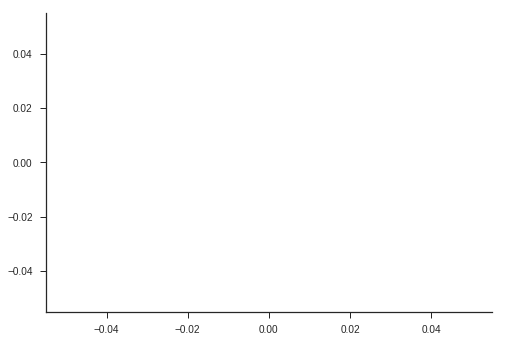

In [40]:
params = np.linspace(0, 1, 100)
p_x = [np.product(st.bernoulli.pmf(data_coin_flips, p)) for p in params]
plt.plot(params, p_x)
sns.despine()

In [0]:
# Not sure what went wrong above

#### Prior Distribution
Notes: